<a href="https://colab.research.google.com/github/Nimika19/Mathematics/blob/main/Monte__Carlo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# f(x, y) = x^2 + y^2, estimate the integral of f(x, y) in the region of 0<=x<=1, 0<=y<=1
import random
import math

def estimate_integral(num_samples):
    total = 0

    for _ in range(num_samples):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        if 0 <= x <= 1 and 0 <= y <= 1:
            total += x**2 + y**2

    return total / num_samples

num_samples = 1000000
estimated_integral = estimate_integral(num_samples)
print(f"Estimated integral: {estimated_integral}")

Estimated integral: 0.666771743083908


In [ ]:
# f(x, y) = x^2 + y^2, estimate the integral of f(x, y) in the region of 0<=x<=1, 0<=y<=1
import random

def MC_int(num_samples):
  a_quarter_circle = 0
  total_sum = 0

  for i in range(num_samples):
    x,y = random.umiform(0,1),  random.uniform(0,1)

    if x**2 + y**2 <= 1:
      a_quarter_circle += 1
      total_sum += x**2 + y**2

  # Avderage value of f(x,y) over the smpled points inside the quarter-circle
  ave_f = total_sum/a_quarter_circle

  # Area of the quarter-circle
  quarter_circle_area = a_quarter_circle/num_samples

  # Estimate the integral: integral = average value of f*area
  integral_estimate = ave_f*quarter_circle_area

  return  integral_estimate

  num_samples = 10000
  integral_estimate = MC_int(num_samples)

  print("Estimate value of the integral (using {num_samples} samples): {integral_estimate}")

In [ ]:
import random

def MC_int(num_samples):
    a_quarter_circle = 0
    total_sum = 0

    for i in range(num_samples):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)

        if x**2 + y**2 <= 1:
            a_quarter_circle += 1
            total_sum += x**2 + y**2

    # Average value of f(x,y) over the sampled points inside the quarter-circle
    ave_f = total_sum / a_quarter_circle

    # Area of the quarter-circle
    quarter_circle_area = 0.25  # The area of a quarter-circle is pi*r^2/4, where r is the radius (1 in this case)

    # Estimate the integral: integral = average value of f*area
    integral_estimate = ave_f * quarter_circle_area

    return integral_estimate

num_samples = 10000
integral_estimate = MC_int(num_samples)

print("Estimate value of the integral (using {} samples): {}".format(num_samples, integral_estimate))

Estimate value of the integral (using 10000 samples): 0.12464954847243051


# Geometric Brownian motion
ddSt = MStdt + oStdWe

St: a stock price at time t

M: drift are rate of return

o: volatility (standard deviation return)  [o is theetha]

Wa: winer process (random noise)

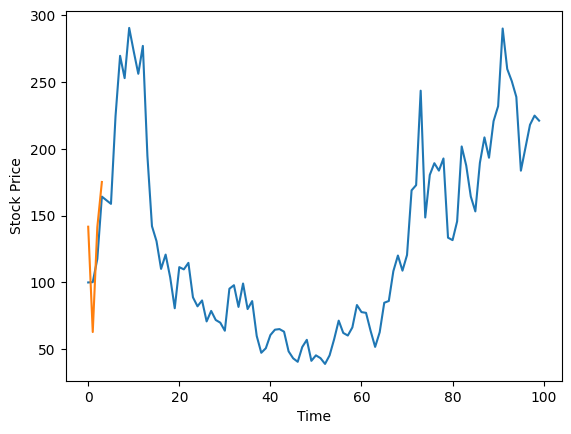

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated stock price data using GBM
np.random.seed(42)
n_days = 100
mu_true = 0.05  # True drift
sigma_true = 0.2  # True volatility
S0 = 100  # Initial stock price

# Simulate stock price
dt = 1  # Time step of 1 day
W = np.random.normal(0, np.sqrt(dt), size=n_days)
s = [S0]
for i in range(1, n_days):
    s.append(s[-1] * np.exp((mu_true - 0.5 * sigma_true ** 2) * dt + sigma_true * W[i]))
# MCMC simulation
n_samples = 10000
n_chains = 4
n_burnin = 1000
n_thin = 10

# Initialize the chains
chains = np.zeros((n_samples, n_chains))

# Initialize the current state of the chains
current_state = np.zeros(n_chains)

# Initialize the proposal distribution
proposal_mean = np.zeros(n_chains)
proposal_var = np.ones(n_chains)

# Run the MCMC simulation
for i in range(n_samples):
    for j in range(n_chains):
        # Propose a new state
        proposed_state = current_state[j] + np.random.normal(proposal_mean[j], proposal_var[j])

        # Calculate the acceptance probability
        acceptance_prob = np.min([1, np.exp((proposed_state - current_state[j]) * (mu_true - 0.5 * sigma_true ** 2))])

        # Accept or reject the proposed state
        if np.random.rand() < acceptance_prob:
            current_state[j] = proposed_state

    # Store the current state
    chains[i] = current_state

# Burn-in and thinning
chains = chains[n_burnin::n_thin]

# Calculate the mean of the chains
mean_chain = np.mean(chains, axis=0)

# Plot the simulated stock price and the MCMC estimate
plt.plot(s)
plt.plot(mean_chain)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated stock price data using GBM
np.random.seed(42)
n_days = 100
mu_true = 0.05  # True drift
sigma_true = 0.2  # True volatility
S0 = 100  # Initial stock price

# Simulate stock price
dt = 1  # Time step of 1 day
W = np.random.normal(0, np.sqrt(dt), size=n_days)
s = [S0]
for i in range(1, n_days):
    s.append(s[-1] * np.exp((mu_true - 0.5 * sigma_true ** 2) * dt + sigma_true * W[i]))

    # Log return
    log_return = np.log(np.array(S[1:]/np.array(s[:-1])))

    # MCMC to estimate mu and sigma
    def log_likelihood(mu,sigma):
      if sigma<=0:
        return -np.inf
      residuals = log_returns - mu*dt
      return -0.5*np.sum(residuals/sigma)**2 + np.log(2*np.pi*sigma**2)

    def MCMC_GBM(num_samples,initial_mu,initial_sigma)
        mu_chain = [initial_mu]
        sigma_chain = [initial_sigma]

        for n in range(num_samples):
          # Propose new value for mu and sigma
          mu_proposal = np.random.normal(mu_chain[-1],0.01)
          sigma_proposal = np.random.normal(sigma_chain[-1],0.01)

          # Calculate the acceptance probability
          log_acceptance_ratio = (log_likelihood(mu_proposal, sigma_proposal) - log_likelihood(mu_chain[-1], sigma_chain[-1]))
          acceptance_prob = np.exp(log_acceptance_ratio)

          # Accept or reject the proposal values
          if np.random.uniform(0,1)<acceptance_prob:
            mu_chain.append(mu_proposal)
            sigma_chain.append(sigma_proposal)
          else:
            mu_chain.append(mu_chain[-1])
            sigma_chain.append(sigma_chain[-1])
        return mu_chain,sigma_chain

        # Run MCMC
        num_samples = 10000
        mu_initial,sigma_initial = 0.1,0.3
        mu_chain,sigma_chain

        print("Estimatem mu:",np.mean(mu_chain))
        print("Estimatem sigma:",np.mean(sigma_chain))



SyntaxError: expected ':' (<ipython-input-8-24cc5db4945e>, line 28)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated stock price data using GBM
np.random.seed(42)
n_days = 100
mu_true = 0.05  # True drift
sigma_true = 0.2  # True volatility
S0 = 100  # Initial stock price

# Simulate stock price
dt = 1  # Time step of 1 day
W = np.random.normal(0, np.sqrt(dt), size=n_days)
s = [S0]
for i in range(1, n_days):
    s.append(s[-1] * np.exp((mu_true - 0.5 * sigma_true ** 2) * dt + sigma_true * W[i]))

# Log return
log_returns = np.log(np.array(s[1:]/np.array(s[:-1])))

# MCMC to estimate mu and sigma
def log_likelihood(mu, sigma):
    if sigma <= 0:
        return -np.inf
    residuals = log_returns - mu * dt
    return -0.5 * np.sum(residuals / sigma) ** 2 + np.log(2 * np.pi * sigma ** 2)

def MCMC_GBM(num_samples, initial_mu, initial_sigma):
    mu_chain = [initial_mu]
    sigma_chain = [initial_sigma]

    for n in range(num_samples):
        # Propose new value for mu and sigma
        mu_proposal = np.random.normal(mu_chain[-1], 0.01)
        sigma_proposal = np.random.normal(sigma_chain[-1], 0.01)

        # Calculate the acceptance probability
        log_acceptance_ratio = (log_likelihood(mu_proposal, sigma_proposal) - log_likelihood(mu_chain[-1], sigma_chain[-1]))
        acceptance_prob = np.exp(log_acceptance_ratio)

        # Accept or reject the proposal values
        if np.random.uniform(0, 1) < acceptance_prob:
            mu_chain.append(mu_proposal)
            sigma_chain.append(sigma_proposal)
        else:
            mu_chain.append(mu_chain[-1])
            sigma_chain.append(sigma_chain[-1])
    return mu_chain, sigma_chain

# Run MCMC
num_samples = 10000
mu_initial, sigma_initial = 0.1, 0.3
mu_chain, sigma_chain = MCMC_GBM(num_samples, mu_initial, sigma_initial)

print("Estimated mu:", np.mean(mu_chain))
print("Estimated sigma:", np.mean(sigma_chain))

Estimated mu: 0.008955169218934222
Estimated sigma: 0.9397901040936777
